In [ ]:
# sumarry about properties of dataset: this data is about marketing campaign through many channels
# tracking the converted customers
# by language and age they segment and contains the date for served , subscribed and cancelled

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
# importing the dataset(marketing campaign)
df = pd.read_csv("marketing (1).csv" , parse_dates=['date_served','date_subscribed','date_canceled'])
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True


In [148]:
df[['converted','is_retained']] = df[['converted','is_retained']].astype('bool')
x = {"House Ads":1,"Facebook":2,"Instagram":3,"Email":4,"Push":5}
df['channel code'] = df['marketing_channel'].map(x)
df['DOW'] = df['date_subscribed'].dt.dayofweek
df['ident_lang'] = np.where(df['language_displayed']==df['language_preferred'], 'yes' , 'no')
df

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel code,DOW,ident_lang
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,1.0,0.0,yes
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,1.0,0.0,yes
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,1.0,0.0,yes
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,1.0,0.0,yes
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,1.0,0.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a100007290,2018-01-17,Email,control,True,German,German,45-55 years,2018-01-17,2018-01-24,Email,False,4.0,2.0,yes
10033,a100007291,2018-01-17,Email,control,True,German,German,55+ years,2018-01-17,NaT,Email,True,4.0,2.0,yes
10034,a100007292,2018-01-05,Instagram,control,False,German,German,55+ years,2018-01-17,NaT,Email,True,3.0,2.0,yes
10035,a100007293,2018-01-17,Email,control,True,German,German,0-18 years,2018-01-17,NaT,Email,True,4.0,2.0,yes


Text(0.5, 1.0, 'measure how many users gain each day')

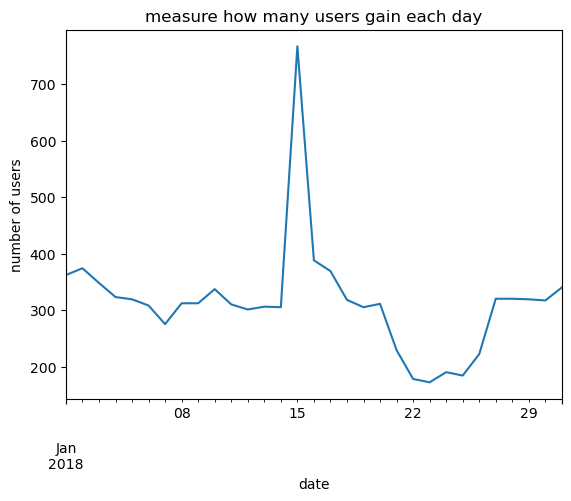

In [33]:
data=df.groupby('date_served')['user_id'].nunique()
data.plot()
plt.xlabel('date')
plt.ylabel('number of users')
plt.title('measure how many users gain each day')

In [50]:
# convertion rate residential rate through all period of time to all channels 
x_con = df[df['converted']==True]['user_id'].nunique()
y_con = df['user_id'].nunique()
convertion_rate = x_con/y_con
convertion_rate1 = convertion_rate * 100
print("convertion_rate : "+ str(convertion_rate1) +'%')
x_res= df[df['is_retained']==True ]['user_id'].nunique()
y_res=df[df['converted']==True]['user_id'].nunique()
restiantial_rate = x_res/y_res
restiantial_rate1 = restiantial_rate * 100
print("restiantial_rate : "+ str(restiantial_rate1) +'%')

convertion_rate : 13.886988644137366%
restiantial_rate : 66.79802955665025%


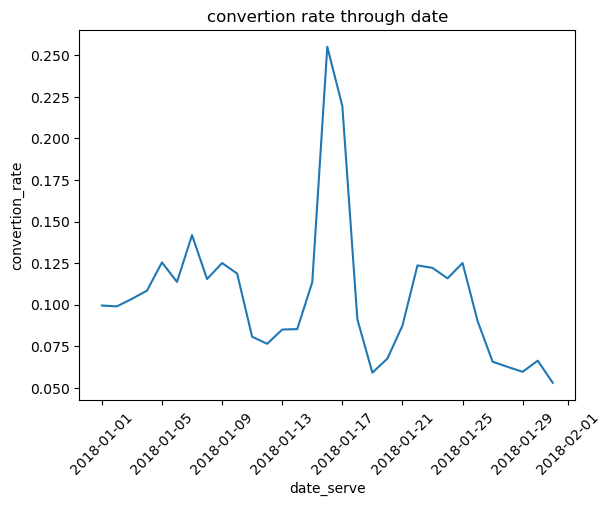

In [84]:
# track the performance of convertion rate through date , marketing channel and age group
def dateframe(data, columns):
    x = data[data['converted'] == True].groupby(columns)['user_id'].nunique()
    y = data.groupby(columns)['user_id'].nunique()
    conversion_rate = x / y
    return conversion_rate
def create_line_plot(x_data, x_label, y_label, title):
    plt.plot(x_data)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()
con_date = dateframe(df, 'date_served')
create_line_plot(con_date, 'date_serve', 'convertion_rate', 'convertion rate through date')



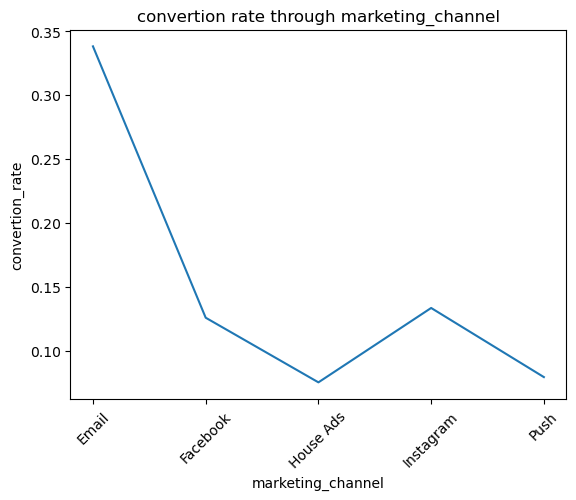

In [85]:
con_channel = dateframe(df, 'marketing_channel')
create_line_plot(con_channel, 'marketing_channel', 'convertion_rate', 'convertion rate through marketing_channel')


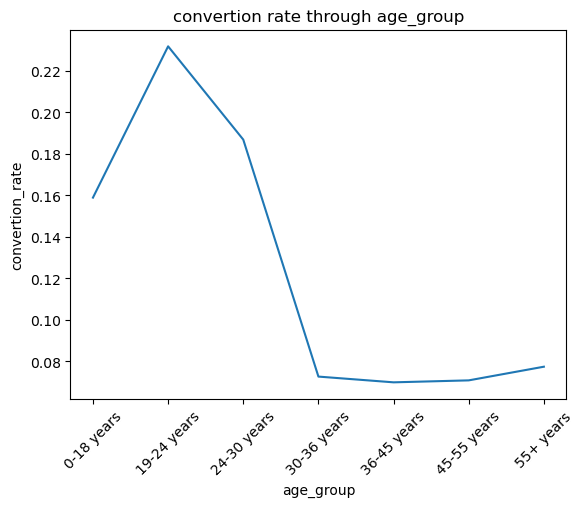

In [86]:
con_age = dateframe(df, 'age_group')
create_line_plot(con_age, 'age_group', 'convertion_rate', 'convertion rate through age_group')


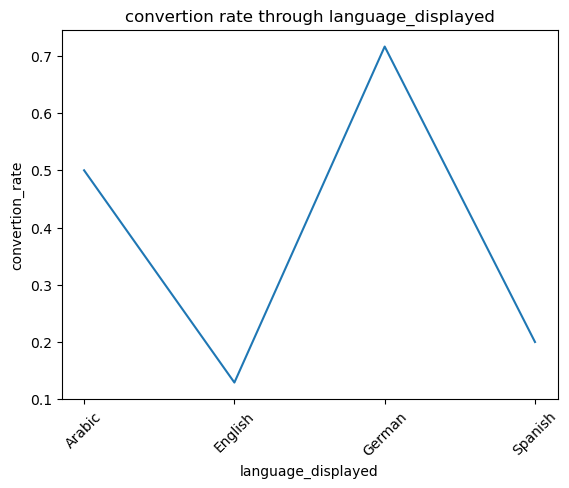

In [87]:
con_lang = dateframe(df, 'language_displayed')
create_line_plot(con_lang, 'language_displayed', 'convertion_rate', 'convertion rate through language_displayed')

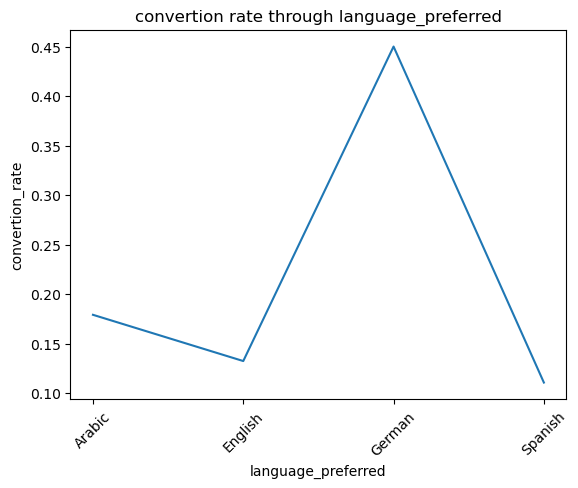

In [88]:
con_language_preferred = dateframe(df, 'language_preferred')
create_line_plot(con_language_preferred, 'language_preferred', 'convertion_rate', 'convertion rate through language_preferred')

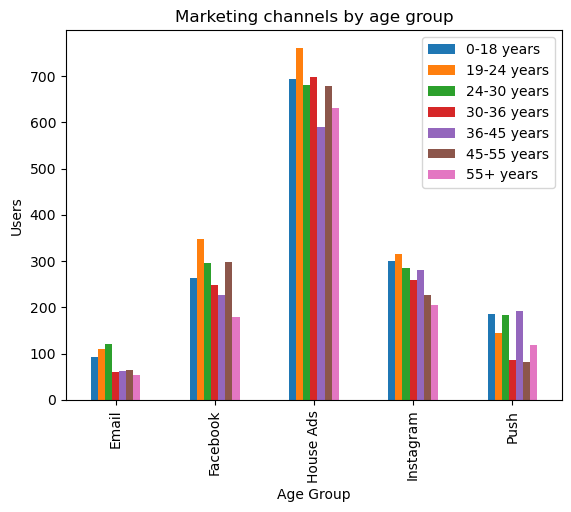

In [112]:
# marketing channels are reaching all users equally or if some marketing channels are serving specific age demographics.
x = df.groupby(['marketing_channel', 'age_group'])['user_id'].count()
x = pd.DataFrame(x.unstack(level = 1))

# Plot the results
x.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc = 'upper right', 
           labels = x.columns.values)
plt.show()

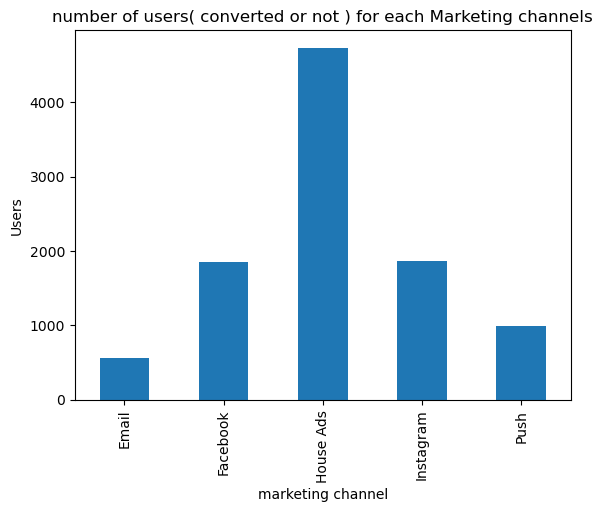

In [135]:
# the number of users for each channel
x = df.groupby('marketing_channel')['user_id'].count()


# Plot the results
x.plot(kind = 'bar')
plt.title('number of users( converted or not ) for each Marketing channels')
plt.xlabel('marketing channel')
plt.ylabel('Users')

plt.show()

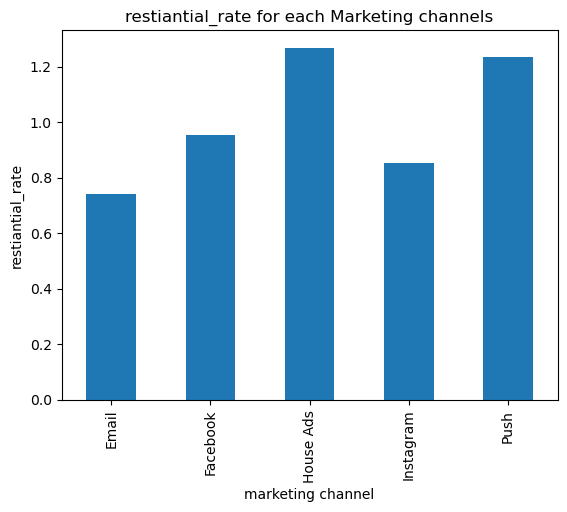

In [139]:
# whose channel had the best retention rate from the campaign,and how many of those subscribers have stayed on the service
def dateframe(data, columns):
    x = data[data['is_retained']==True].groupby(columns)['user_id'].nunique()
    y = data[data['converted']==True].groupby(columns)['user_id'].nunique()
    restiantial_rate = x / y
    return restiantial_rate

res_chaneel = dateframe(df,'marketing_channel')
v=  res_chaneel.sort_values()
v
# Plot the results
res_chaneel.plot(kind = 'bar')
plt.title('restiantial_rate for each Marketing channels')
plt.xlabel('marketing channel')
plt.ylabel('restiantial_rate')

plt.show()



In [141]:
res_chaneel = dateframe(df,'marketing_channel')
v=  res_chaneel.sort_values(ascending=False)
v

marketing_channel
House Ads    1.268456
Push         1.233766
Facebook     0.954751
Instagram    0.853448
Email        0.743316
Name: user_id, dtype: float64

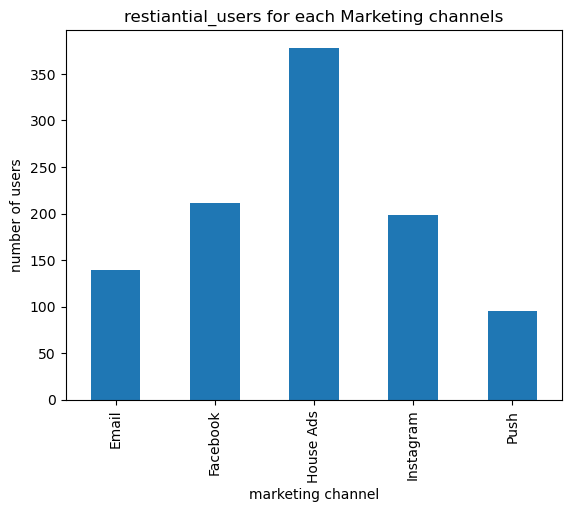

In [134]:
x = df[df['is_retained']==True].groupby('marketing_channel')['user_id'].nunique()
# Plot the results
x.plot(kind = 'bar')
plt.title('restiantial_users for each Marketing channels')
plt.xlabel('marketing channel')
plt.ylabel('number of users')

plt.show()

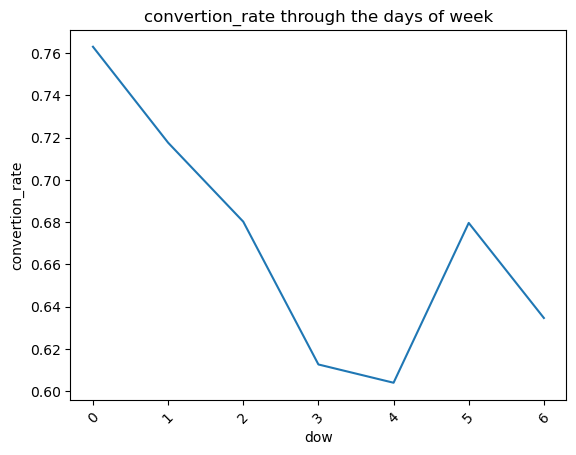

In [147]:
# discovered down in 11 jaunary, we want to know why and try to identify potential causes for the decrease.
# the first cause : launching the campaing in different unusual day.
dow_con = dateframe(df,'DOW')
create_line_plot(dow_con,'dow','convertion_rate','convertion_rate through the days of week')

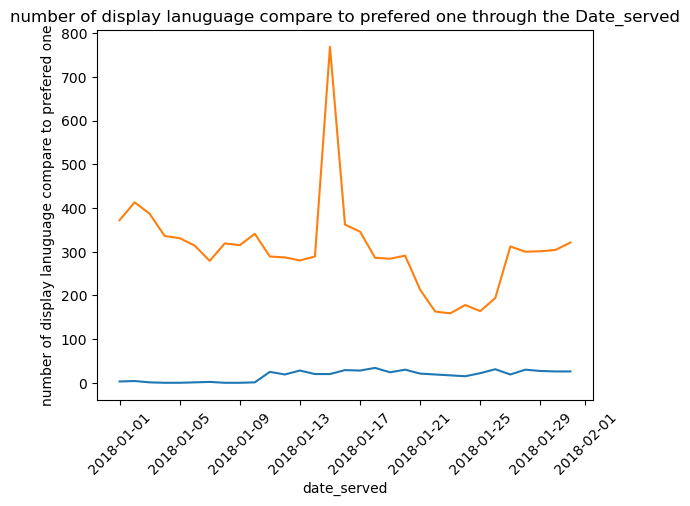

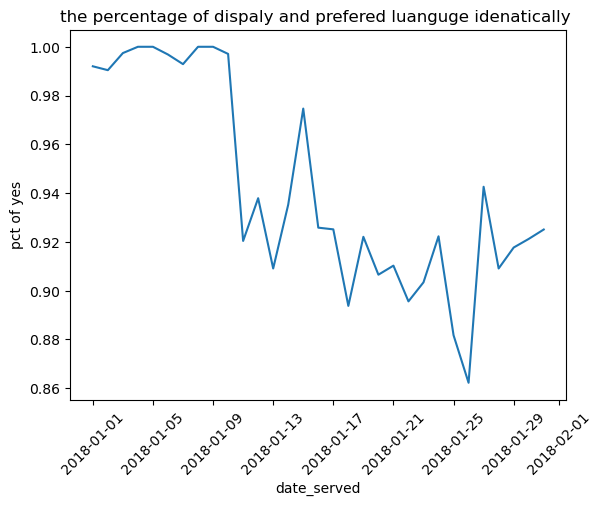

In [174]:
# the second cause : launching campaigns in difference between displayed and prefered lauguages.
# Groupby date_served and is_correct_lang
language_check = df.groupby(['date_served','ident_lang'])['ident_lang'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)


create_line_plot(language_check_df,'date_served','number of display lanuguage compare to prefered one','number of display lanuguage compare to prefered one through the Date_served')
# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['yes']/language_check_df.sum(axis=1)

# Plot and show your results
plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.xticks(rotation=45)
plt.xlabel('date_served')
plt.ylabel('pct of yes')
plt.title('the percentage of dispaly and prefered luanguge idenatically ')
plt.show()


In [ ]:
# from here we got that conversion rate decrease to two reasons one laucning campaingns in unusual days like tuesday and wednesday
# as they have the lowest conversion rate compare to weekends.
# the second that display all the campaigns in one language (English) rather than the prefered one to users and that drop down 
# the conversion rate after 11 jan.

In [178]:
# need to know how many users we lost in result to this bug.
# Calculate pre-error conversion rate
house_ads_bug = df[df['date_served'] < '2018-01-11']
lang_conv = dateframe(house_ads_bug, ['language_displayed']) 
print(lang_conv)

# Index other language conversion rate against English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)
# Group house_ads by date and language
converted = df.groupby(['date_served', 
                          'language_preferred'])\
                        .agg({'user_id':'nunique',
                              'converted':'sum'})

# Unstack converted
converted_df = pd.DataFrame(converted.unstack(level=1))
# Create English conversion rate column for affected period
converted['english_conv_rate'] = converted_df.loc['2018-01-11':'2018-01-31'][('converted','English')]

# Create expected conversion rates for each language
converted['expected_spanish_rate'] = converted['english_conv_rate']*spanish_index
converted['expected_arabic_rate'] = converted['english_conv_rate']*arabic_index
converted['expected_german_rate'] = converted['english_conv_rate']*german_index

# Multiply number of users by the expected conversion rate
converted['expected_spanish_conv'] = converted['expected_spanish_rate']/100*converted_df[('user_id','Spanish')]
converted['expected_arabic_conv'] = converted['expected_arabic_rate']/100*converted_df[('user_id','Arabic')]
converted['expected_german_conv'] = converted['expected_german_rate']/100*converted_df[('user_id','German')]
# Use .loc to slice only the relevant dates
converted = converted.loc['2018-01-11':'2018-01-31']

# Sum expected subscribers for each language
expected_subs = converted['expected_spanish_conv'].sum() + converted['expected_arabic_conv'].sum() + converted['expected_german_conv'].sum()

# Calculate how many subscribers we actually got
actual_subs = converted_df[('converted','Spanish')].sum() + converted_df[('converted','Arabic')].sum() + converted_df[('converted','German')].sum()

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subs - actual_subs
print(lost_subs)

language_displayed
Arabic     1.444444
English    8.030303
German     1.833333
Spanish    5.411765
Name: user_id, dtype: float64
Spanish index: 0.6739178690344062
Arabic index: 0.17987421383647798
German index: 0.2283018867924528
-114.0
